# Latest version

In [ ]:
# Also look at this folder
/share/data_supergrover1/weihsbach/shared_data/tmp/Mind_Journal_2022_experiments

In [6]:
#%%
import torch
import nibabel as nib
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def dice_coeff(outputs, labels, max_label=None):
    """Function to calculate dice scores. Outputs and labels should have the same spatial resolution and be in argmax
    (one channel) format. max_label should be an integer with the maximum number of labels (eg. 7 if your highest
    label is 7). """
    if max_label is None:
        max_label = int(torch.max(labels).item())
    dice = torch.FloatTensor(max_label).fill_(0)
    for label_num in range(1, max_label+1):
        iflat = (outputs == label_num).reshape(-1).float()
        tflat = (labels == label_num).reshape(-1).float()
        intersection = torch.mean(iflat * tflat)
        dice[label_num - 1] = (2. * intersection) / (1e-8 + torch.mean(iflat) + torch.mean(tflat))
    return dice

def load_dices(base_path,labels_num,modalities=['source','flip','cimdg','rfa','mind','cut','target'],exclude_label=None, path_overrides=None):
    if path_overrides is None:
        path_overrides = [None]*len(modalities)
        
    files = sorted(os.listdir(base_path+'gt/'))
    dices_source = torch.zeros((len(files)))
    dices_flip = torch.zeros((len(files)))
    dices_cimdg = torch.zeros((len(files)))
    dices_rfa = torch.zeros((len(files)))
    dices_mind = torch.zeros((len(files)))
    dices_cut = torch.zeros((len(files)))
    dices_target = torch.zeros((len(files)))
    for i,f in enumerate(files):
        if 'source' in modalities:
            path = path_overrides[modalities.index('source')] if path_overrides[modalities.index('source')] is not None else base_path
            source = torch.from_numpy(nib.load(path+'source/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp = dice_coeff(source,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
                #print(tmp)
            dices_source[i] = torch.sum(tmp)/ln
        if 'flip' in modalities:
            path = path_overrides[modalities.index('flip')] if path_overrides[modalities.index('flip')] is not None else base_path
            flip = torch.from_numpy(nib.load(path+'flip_augmentation/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp = dice_coeff(flip,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
                #print(tmp)
            dices_flip[i] = torch.sum(tmp)/ln
        if 'cimdg' in modalities:
            path = path_overrides[modalities.index('cimdg')] if path_overrides[modalities.index('cimdg')] is not None else base_path
            insda = torch.from_numpy(nib.load(path+'cimdg/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp = dice_coeff(insda,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
                #print(tmp)
            dices_cimdg[i] = torch.sum(tmp)/ln
        if 'rfa' in modalities:
            path = path_overrides[modalities.index('rfa')] if path_overrides[modalities.index('rfa')] is not None else base_path
            da = torch.from_numpy(nib.load(path+'randomfield_augmentation/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp= dice_coeff(da,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
            dices_rfa[i] = torch.sum(tmp)/ln
        if 'mind' in modalities:
            path = path_overrides[modalities.index('mind')] if path_overrides[modalities.index('mind')] is not None else base_path
            mind = torch.from_numpy(nib.load(path+'mind/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp = dice_coeff(mind,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
                #print(tmp)
            dices_mind[i] = torch.sum(tmp)/ln
        if 'cut' in modalities:
            path = path_overrides[modalities.index('cut')] if path_overrides[modalities.index('cut')] is not None else base_path
            cut = torch.from_numpy(nib.load(path+'fast_cut_3000/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp = dice_coeff(cut,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
                #print(tmp)
            dices_cut[i] = torch.sum(tmp)/ln
        if 'target' in modalities:
            path = path_overrides[modalities.index('target')] if path_overrides[modalities.index('target')] is not None else base_path
            target = torch.from_numpy(nib.load(path+'target/'+f).get_fdata()).long().contiguous()
            gt = nib.load(base_path+'gt/'+f)
            gt = torch.from_numpy(gt.get_fdata()).long().contiguous()
            tmp = dice_coeff(target,gt,labels_num)*100
            ln = labels_num
            if exclude_label is not None:
                tmp = torch.cat((tmp[:exclude_label],tmp[exclude_label+1:]))
                ln = labels_num-1
                #print(tmp)
            dices_target[i] = torch.sum(tmp)/ln
    print('Mean dice trained on \n source: {},\n flip: {}, \n CIMDG: {}, \n CUT: {}, \n target: {}, \n RFA: {}, \n MIND: {}'.format(dices_source.mean(),dices_flip.mean(),dices_cimdg.mean(),dices_cut.mean(),dices_target.mean(),dices_rfa.mean(),dices_mind.mean()))
    return [dices_source,dices_flip, dices_cimdg, dices_cut, dices_target,dices_rfa, dices_mind]



In [7]:
#E1 data
path = '/share/data_sam2/ckruse/Mind_Journal_2022_experiments/E1_Canine/'
labels_num = 8
modalities=['source',"flip",'rfa','mind','target','cimdg','cut']
dices_E1 = load_dices(path,labels_num,modalities=modalities,exclude_label = 4)

#E2 data
path = '/share/data_sam2/ckruse/Mind_Journal_2022_experiments/E2_CrossMoDa/'
labels_num = 2
modalities=['source','flip','rfa','mind','cut','target','cimdg']
dices_E2 = load_dices(path,labels_num,modalities=modalities)

#E3 data
path = '/share/data_sam2/ckruse/Mind_Journal_2022_experiments/E3_Abdomen_MR_CT/'
labels_num = 4
modalities=[
    'source',
    'flip',
    'rfa',
    'mind',
    'target',
    'cimdg',                                                                                              \
    'cut'
]
path_overrides = [
    None,    
    None,  
    None, 
    None,  
    None,    
    '/share/data_supergrover1/weihsbach/shared_data/tmp/Mind_Journal_2022_experiments/E3_Abdomen_MR_CT/', 
    None]
dices_E3 = load_dices(path,labels_num,modalities=modalities,path_overrides=path_overrides)

#E4 data
path = '/share/data_sam2/ckruse/Mind_Journal_2022_experiments/E4_Abdomen_CT_MR/'
path_overrides = [
    None,
    None,
    None,
    None,
    None,
    '/share/data_supergrover1/weihsbach/shared_data/tmp/Mind_Journal_2022_experiments/E4_Abdomen_CT_MR/',
    None]
labels_num = 4
modalities=['source','flip','rfa','mind','target','cimdg','cut']
dices_E4 = load_dices(path,labels_num,modalities=modalities,path_overrides=path_overrides)

Mean dice trained on 
 source: 23.13534927368164,
 flip: 38.863460540771484, 
 CIMDG: 80.77249908447266, 
 CUT: 78.89985656738281, 
 target: 75.0539321899414, 
 RFA: 75.62162780761719, 
 MIND: 80.5461196899414
Mean dice trained on 
 source: 31.64202308654785,
 flip: 33.324668884277344, 
 CIMDG: 62.1313591003418, 
 CUT: 77.33019256591797, 
 target: 84.04185485839844, 
 RFA: 77.85691833496094, 
 MIND: 74.8622817993164
Mean dice trained on 
 source: 76.13433837890625,
 flip: 23.80099105834961, 
 CIMDG: 64.84124755859375, 
 CUT: 77.04842376708984, 
 target: 91.3893814086914, 
 RFA: 86.41863250732422, 
 MIND: 87.59661865234375
Mean dice trained on 
 source: 17.780319213867188,
 flip: 0.8553023338317871, 
 CIMDG: 39.0952033996582, 
 CUT: 26.833580017089844, 
 target: 87.2138671875, 
 RFA: 52.207340240478516, 
 MIND: 76.43017578125


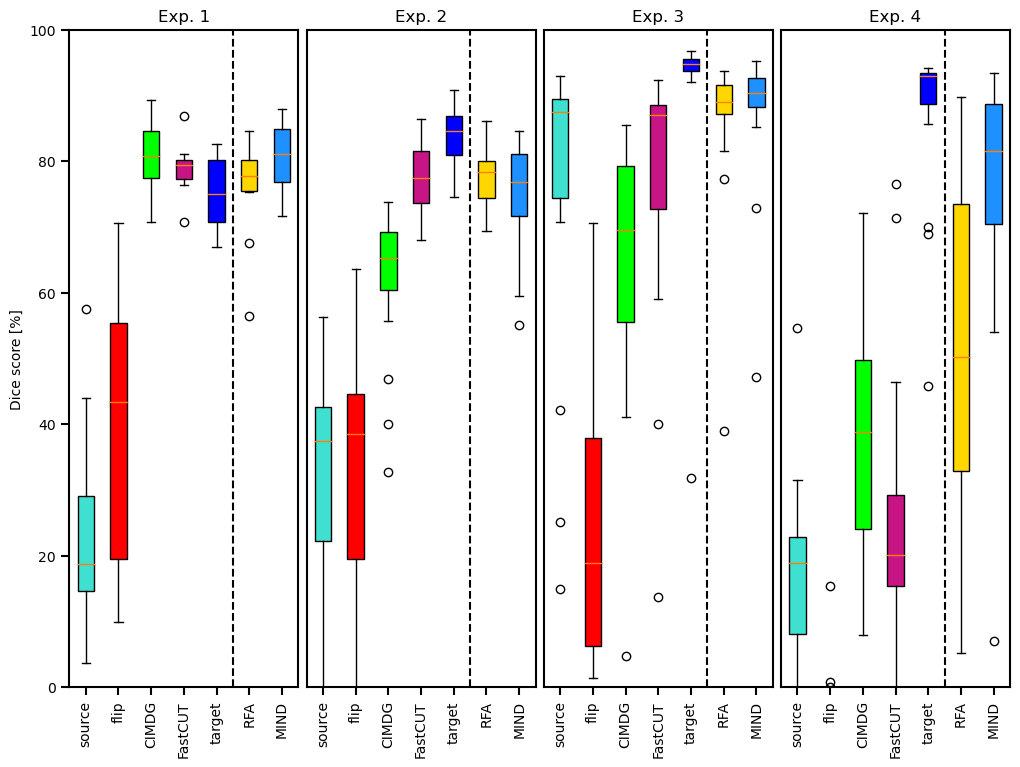

In [8]:
fig = plt.figure(figsize =(10, 7))
ax = []
tick_labels = ['source','flip','CIMDG','FastCUT','target', 'RFA', 'MIND']
#E1
ax.append(fig.add_subplot(1,4,1))
ax[0].set_title('Exp. 1')
bp = ax[0].boxplot(dices_E1, patch_artist = True, vert = 1)  
colors = ['#40e0d0','#ff0000',  '#00ff00','#c71585', '#0000ff','#ffd700', '#1e90ff']
plt.ylim(0,100)
plt.vlines(5.5, 0, 100, colors='k', linestyles='dashed', label='')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=90)
#E2
ax.append(fig.add_subplot(1,4,2))
ax[1].set_title('Exp. 2')
bp = ax[1].boxplot(dices_E2, patch_artist = True, vert = 1)  
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.vlines(5.5, 0, 100, colors='k', linestyles='dashed', label='')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
    
#E3
ax.append(fig.add_subplot(1,4,3))
ax[2].set_title('Exp. 3')
bp = ax[2].boxplot(dices_E3, patch_artist = True, vert = 1) 
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.vlines(5.5, 0, 100, colors='k', linestyles='dashed', label='')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
#E4
ax.append(fig.add_subplot(1,4,4))
ax[3].set_title('Exp. 4')
bp = ax[3].boxplot(dices_E4, patch_artist = True, vert = 1)  
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.vlines(5.5, 0, 100, colors='k', linestyles='dashed', label='')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

    
for i in range(1,len(ax)):
    ax[i].set_yticks([])
for i in range(0,len(ax)):   
    #ax[i].set_ylim(0,100)
    ax[i].tick_params(direction='out', length=6, width=1.5,
           grid_color='r', grid_alpha=0.5)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i].spines[axis].set_linewidth(1.5)  # change width
ax[0].set_ylabel('Dice score [%]')
#ax[1].set_yticks([])
fig.tight_layout(pad=0)
for i in range(len(ax)):
    ax[i].set_xticklabels(tick_labels)
if True:
    plt.savefig('Journal_results.pdf',bbox_inches='tight')
plt.show()

In [4]:
import torch
import nibabel as nib
def labelMatrixOneHot(segmentation, label_num):
    B, H, W = segmentation.size()
    values = segmentation.view(B, 1, H, W).expand(B, label_num, H, W).to(segmentation.device)
    linspace = torch.linspace(0, label_num - 1, label_num).long().view(1, label_num, 1, 1).expand(B, label_num, H,
                                                                                                  W).to(
        segmentation.device)
    matrix = (values.float() == linspace.float()).float().to(segmentation.device)
    for j in range(2, matrix.shape[1]):
        matrix[0, j, :, :] = matrix[0, j, :, :]  # torch.from_numpy(grey_dilation(grey_erosion(,size=(3,3)),size=(3,3)))
    return matrix

def overlaySegment(gray1, seg1, flag=False):
    device = gray1.device
    H, W = seg1.squeeze().size()
    colors = torch.FloatTensor(
        [0, 0, 0, 225, 140, 154, 78, 129, 170, 199, 67, 66, 45, 170, 170, 240, 110, 38, 111, 163, 91, 235, 175, 86, 202,
         255, 52, 162, 0, 183]).view(-1, 3) / 255.0
    segs1 = labelMatrixOneHot(seg1.unsqueeze(0), 8)

    seg_color = torch.mm(segs1.reshape(8, -1).t(), colors[:8, :].to(device)).reshape(H, W, 3)
    alpha = torch.clamp(1.0 - 0.5 * (seg1 > 0).float(), 0, 1.0)
    gray1 -= torch.min(gray1); gray1 /= torch.max(gray1) # scale to 0 - 1
    overlay = (gray1 * alpha).unsqueeze(2) + seg_color * (1.0 - alpha).unsqueeze(2)
    if flag:
        plt.imshow(overlay.cpu().numpy())
        plt.show()
    return overlay



In [11]:
import matplotlib.pyplot as plt
base_path = '/share/data_sam2/ckruse/Mind_Journal_2022_experiments/'
path_override = '/share/data_supergrover1/weihsbach/shared_data/tmp/Mind_Journal_2022_experiments/'

result_paths=['gt/','source/','flip_augmentation/','fast_cut_3000/','cimdg/','target/','randomfield_augmentation/','mind/']

E1_file = ['Canine_022.nii.gz','Canine_022_0000.nii.gz']
E2_file = ['CrossMoDa_000.nii.gz','CrossMoDa_000_0000.nii.gz']
E3_file = ['Visceral_CT_002.nii.gz','Visceral_CT_002_0000.nii.gz']
E4_file = ['Visceral_MR_000.nii.gz','Visceral_MR_000_0000.nii.gz']
E1_segs =[]
E2_segs = []
E3_segs = []
E4_segs =[]
for file in result_paths:
    path = base_path
    E1_segs.append(torch.from_numpy(nib.load(path+'E1_Canine/'+file + E1_file[0]).get_fdata()).long().contiguous())
    E2_segs.append(torch.from_numpy(nib.load(path+'E2_CrossMoDa/'+file + E2_file[0]).get_fdata()).long().contiguous())
    if file == 'cimdg/':
        path = path_override
    else:
        path = base_path
    E3_segs.append(torch.from_numpy(nib.load(path+'E3_Abdomen_MR_CT/'+file + E3_file[0]).get_fdata()).long().contiguous())
    
    if file == 'cimdg/':
        path = path_override
    else:
        path = base_path
    E4_segs.append(torch.from_numpy(nib.load(path+'E4_Abdomen_CT_MR/'+file + E4_file[0]).get_fdata()).long().contiguous())

E1 = torch.from_numpy(nib.load('/share/data_sam2/ckruse/Canine_testdata/target/images/' + E1_file[-1]).get_fdata()).float().contiguous().squeeze()
E2 = torch.from_numpy(nib.load('/share/data_sam2/ckruse/CrossMoDa_testdata/L4_fine_localized_crop/validation/images/' + E2_file[-1]).get_fdata()).float().contiguous().squeeze()
E3 = torch.from_numpy(nib.load('/share/data_sam2/ckruse/Abdomen_testdata/Visceral_CT/images/' + E3_file[-1]).get_fdata()).float().contiguous().squeeze()
E4 = torch.from_numpy(nib.load('/share/data_sam2/ckruse/Abdomen_testdata/Visceral_MR/images/' + E4_file[-1]).get_fdata()).float().contiguous().squeeze()

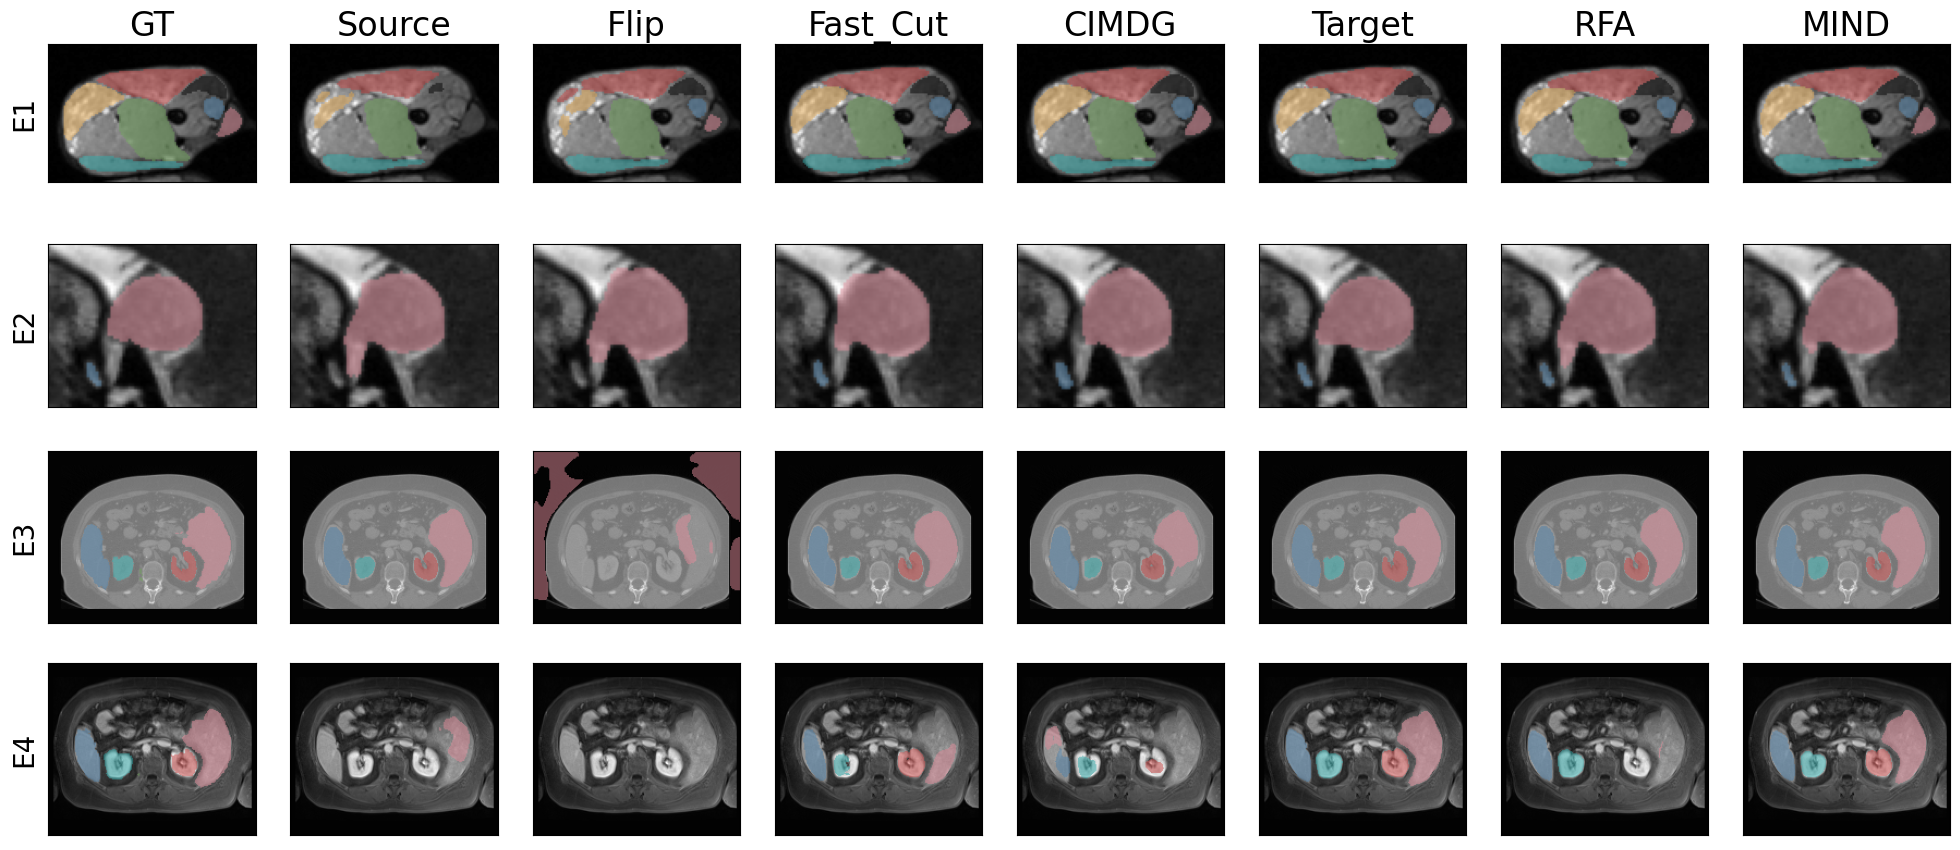

In [12]:
def add_subplot(img,seg,fig,ind,xlabel=None,ylabel=None):
    ax = fig.add_subplot(4,len(E1_segs),ind)
    ax.imshow(overlaySegment(img,seg).cpu().numpy())
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.axis('off')
    if xlabel is not None: ax.set_title(xlabel)
    if ylabel is not None: ax.set_ylabel(ylabel)

def cut_image(img,cuts,slice):
    return img[cuts[0]:cuts[1],cuts[2]:cuts[3],slice]

n_x = len(E1_segs)
x_label =['GT','Source','Flip','Fast_Cut','CIMDG','Target','RFA','MIND']
fig = plt.figure(figsize=(20,9))
plt.rc('font', size=20) 
#fig.margins(0)
E1_slice = 100
E1_cuts = [50,130,60,180]
for i,seg in enumerate(E1_segs):
    if i==0:y_label = 'E1' 
    else: y_label = None 
    add_subplot(cut_image(E1,E1_cuts,E1_slice), cut_image(seg,E1_cuts,E1_slice),fig,i+1,xlabel=x_label[i],ylabel=y_label)    

E2_slice = 68
E2_cuts = [20,75,50,120]
for i,seg in enumerate(E2_segs):
    if i==0:y_label = 'E2' 
    else: y_label = None 
    add_subplot(cut_image(E2,E2_cuts,E2_slice), cut_image(seg,E2_cuts,E2_slice),fig,i+1+n_x,xlabel=None,ylabel=y_label)    

E3_slice = 120
E3_cuts = [0,-1,0,-1]
for i,seg in enumerate(E3_segs):
    if i==0:y_label = 'E3' 
    else: y_label = None 
    add_subplot(cut_image(E3,E3_cuts,E3_slice).transpose(1,0), cut_image(seg,E3_cuts,E3_slice).transpose(1,0),fig,i+1+2*n_x,xlabel=None,ylabel=y_label)    

E4_slice = 116
E4_cuts = [0,-1,0,-1]
for i,seg in enumerate(E4_segs):
    if i==0:y_label = 'E4' 
    else: y_label = None 
    add_subplot(cut_image(E4,E4_cuts,E4_slice).transpose(1,0), cut_image(seg,E4_cuts,E4_slice).transpose(1,0),fig,i+1+3*n_x,xlabel=None,ylabel=y_label)    

fig.tight_layout()
fig.savefig('/share/data_supergrover1/weihsbach/shared_data/tmp/Mind_Journal_2022_experiments/images.png',  dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )
plt.show()


###### 